<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Final-Project-Submission" data-toc-modified-id="Final-Project-Submission-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Final Project Submission</a></span></li><li><span><a href="#Import-nesecarry-libraries" data-toc-modified-id="Import-nesecarry-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import nesecarry libraries</a></span></li><li><span><a href="#Dataset-Prep" data-toc-modified-id="Dataset-Prep-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dataset Prep</a></span></li><li><span><a href="#Execute-code-below" data-toc-modified-id="Execute-code-below-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Execute code below</a></span></li><li><span><a href="#Read-in-Data" data-toc-modified-id="Read-in-Data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Read in Data</a></span><ul class="toc-item"><li><span><a href="#What-is-the-distribution-across-the-categories?" data-toc-modified-id="What-is-the-distribution-across-the-categories?-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>What is the distribution across the categories?</a></span></li><li><span><a href="#Checking-for-invalid-images" data-toc-modified-id="Checking-for-invalid-images-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Checking for invalid images</a></span></li><li><span><a href="#Calculate-number-of-images-in-train,-test-and-validation" data-toc-modified-id="Calculate-number-of-images-in-train,-test-and-validation-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Calculate number of images in train, test and validation</a></span></li></ul></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Create-keras-model" data-toc-modified-id="Create-keras-model-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Create keras model</a></span></li><li><span><a href="#Save-model" data-toc-modified-id="Save-model-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Save model</a></span></li><li><span><a href="#Visualize-training-history" data-toc-modified-id="Visualize-training-history-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Visualize training history</a></span></li><li><span><a href="#Evalute-test-data" data-toc-modified-id="Evalute-test-data-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Evalute test data</a></span></li></ul></li><li><span><a href="#Pre-Trained-Network-Part-1" data-toc-modified-id="Pre-Trained-Network-Part-1-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Pre-Trained Network Part 1</a></span><ul class="toc-item"><li><span><a href="#Fine-tuning-the-network" data-toc-modified-id="Fine-tuning-the-network-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Fine-tuning the network</a></span></li><li><span><a href="#Save-model" data-toc-modified-id="Save-model-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Save model</a></span></li><li><span><a href="#Visualize-training-history" data-toc-modified-id="Visualize-training-history-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Visualize training history</a></span></li><li><span><a href="#Evaluate-test-data" data-toc-modified-id="Evaluate-test-data-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Evaluate test data</a></span></li></ul></li><li><span><a href="#Pre-Trained-Network-Part-2" data-toc-modified-id="Pre-Trained-Network-Part-2-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Pre-Trained Network Part 2</a></span><ul class="toc-item"><li><span><a href="#Visualize-training-history" data-toc-modified-id="Visualize-training-history-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Visualize training history</a></span></li><li><span><a href="#Evaluate-test-data" data-toc-modified-id="Evaluate-test-data-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Evaluate test data</a></span></li></ul></li></ul></div>

# Final Project Submission

Please fill out:
* Student name: **Stephan Osterburg**
* Student pace: **Full Time**
* Scheduled project review date/time: **2/8/2019**
* Instructor name: **Rafael Carrasco**
* Blog post URL: 


# Import nesecarry libraries

In [190]:
import sys, os, shutil

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from tqdm import tqdm
from itertools import chain

from PIL import Image
from scipy import ndimage

from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize

import tensorflow as tf

import keras
from keras import optimizers
from keras.applications import VGG16, VGG19
from keras.models import Model, load_model, Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import backend as K

np.random.seed(42)

# Dataset Prep

The dataset contains two directories which can be compined. Also, there are some bad images (invalid) which we need to delete. While we are at it, we will re-orginize the directory structure a little bit and rename the images. This is just for us and not necessarily needed for keras. 

This is a one off and can be remove from the notebook. For the time being I will leave it in here for documentation. But shouldn't be executed again, otherwise we will just see errors.

In [7]:
%ls dataset/training_set/drawings/

01dee7c857692cce250fcc7fba309f3f.jpg  i - 476.jpeg*
1007036943.jpg*                       i - 479.jpeg*
10288_mainfoto_05.jpg                 i - 48.jpeg*
1601_mainfoto_05.jpg                  i - 482.jpeg*
167176.jpg                            i - 483.jpeg*
1677_mainfoto_05.jpg                  i - 485.jpeg*
2051_mainfoto_05.jpg                  i - 486.jpeg*
2200_mainfoto_05.jpg                  i - 487.jpeg*
2206_mainfoto_05.jpg                  i - 488.jpeg*
2208_mainfoto_05.jpg                  i - 489.jpeg*
2211_mainfoto_05.jpg                  i - 49.jpeg*
2212_mainfoto_05.jpg                  i - 490 20.25.37.jpeg*
2260_mainfoto_05.jpg                  i - 491.jpeg*
2266_mainfoto_05.jpg                  i - 492.jpeg*
2294_mainfoto_05.jpg                  i - 493.jpeg*
3354_mainfoto_05.jpg                  i - 494.jpeg*
3372_mainfoto_05.jpg                  i - 495.jpeg*
3389_mainfoto_05.jpg                  i - 497.jpeg*
3394_mainfoto_05.jpg                  i - 498.jpeg*
3396_

In [42]:
%ls musemart/training_set/drawings/

01dee7c857692cce250fcc7fba309f3f.jpg  images (14).jpeg
10288_mainfoto_05.jpg                 images (15).jpeg
1601_mainfoto_05.jpg                  images (16).jpeg
167176.jpg                            images (17).jpeg
1677_mainfoto_05.jpg                  images (19).jpeg
2051_mainfoto_05.jpg                  images (2).jpeg
2200_mainfoto_05.jpg                  images (20).jpeg
2202_mainfoto_05.jpg                  images (21).jpeg
2206_mainfoto_05.jpg                  images (22).jpeg
2208_mainfoto_05.jpg                  images (23).jpeg
2211_mainfoto_05.jpg                  images (24).jpeg
2212_mainfoto_05.jpg                  images (26).jpeg
2266_mainfoto_05.jpg                  images (28).jpeg
2294_mainfoto_05.jpg                  images (29).jpeg
2328_mainfoto_05.jpg                  images (3).jpeg
3354_mainfoto_05.jpg                  images (30).jpeg
3372_mainfoto_05.jpg                  images (31).jpeg
3389_mainfoto_05.jpg                  images (32).jpeg
3394_mainfot

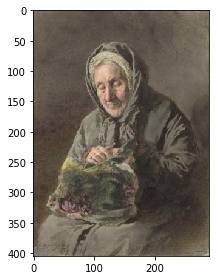

In [56]:
io.imshow('musemart/training_set/drawings/1677_mainfoto_05.jpg');

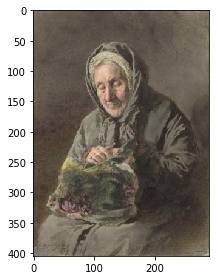

In [57]:
io.imshow('dataset/training_set/drawings/1677_mainfoto_05.jpg');

Looks like that we have duplicates in dataset and musemart.

In [22]:
src_dirs_0 = ['dataset', 'musemart']
src_dirs_1 = ['training_set', 'validation_set']
src_dirs_2 = ['sculpture', 'iconography', 'engraving', 'drawings', 'painting']

In [66]:
# copying files from musemart to dataset (merge data)
for sub_dir in src_dirs_1:
    for d in src_dirs_2:
        src_dir = src_dirs_0[1] + '/' + sub_dir + '/' + d
        files = os.listdir(src_dir)
        
        dst_dir = src_dirs_0[0] + '/' + sub_dir + '/' + d
        
        for file in files:
            shutil.copy(os.path.join(src_dir, file), os.path.join(dst_dir, file))

In [67]:
# Rename files to to something more simple
for sub_dir in src_dirs_1:
    for d in src_dirs_2:
        src_dir = src_dirs_0[0] + '/' + sub_dir + '/' + d
        files = os.listdir(src_dir)

        print('-' * 50)
        print(src_dir + '\n')

        for i, file in enumerate(files):
            new_name = 'image.' + str(i) + '.jpg'
            os.rename(os.path.join(src_dir, file), os.path.join(src_dir, new_name))
            print(os.path.join(src_dir, new_name))

--------------------------------------------------
dataset/training_set/sculpture

dataset/training_set/sculpture/image.0.jpg
dataset/training_set/sculpture/image.1.jpg
dataset/training_set/sculpture/image.2.jpg
dataset/training_set/sculpture/image.3.jpg
dataset/training_set/sculpture/image.4.jpg
dataset/training_set/sculpture/image.5.jpg
dataset/training_set/sculpture/image.6.jpg
dataset/training_set/sculpture/image.7.jpg
dataset/training_set/sculpture/image.8.jpg
dataset/training_set/sculpture/image.9.jpg
dataset/training_set/sculpture/image.10.jpg
dataset/training_set/sculpture/image.11.jpg
dataset/training_set/sculpture/image.12.jpg
dataset/training_set/sculpture/image.13.jpg
dataset/training_set/sculpture/image.14.jpg
dataset/training_set/sculpture/image.15.jpg
dataset/training_set/sculpture/image.16.jpg
dataset/training_set/sculpture/image.17.jpg
dataset/training_set/sculpture/image.18.jpg
dataset/training_set/sculpture/image.19.jpg
dataset/training_set/sculpture/image.20.jpg
dat

dataset/training_set/sculpture/image.791.jpg
dataset/training_set/sculpture/image.792.jpg
dataset/training_set/sculpture/image.793.jpg
dataset/training_set/sculpture/image.794.jpg
dataset/training_set/sculpture/image.795.jpg
dataset/training_set/sculpture/image.796.jpg
dataset/training_set/sculpture/image.797.jpg
dataset/training_set/sculpture/image.798.jpg
dataset/training_set/sculpture/image.799.jpg
dataset/training_set/sculpture/image.800.jpg
dataset/training_set/sculpture/image.801.jpg
dataset/training_set/sculpture/image.802.jpg
dataset/training_set/sculpture/image.803.jpg
dataset/training_set/sculpture/image.804.jpg
dataset/training_set/sculpture/image.805.jpg
dataset/training_set/sculpture/image.806.jpg
dataset/training_set/sculpture/image.807.jpg
dataset/training_set/sculpture/image.808.jpg
dataset/training_set/sculpture/image.809.jpg
dataset/training_set/sculpture/image.810.jpg
dataset/training_set/sculpture/image.811.jpg
dataset/training_set/sculpture/image.812.jpg
dataset/tr

dataset/training_set/sculpture/image.1527.jpg
dataset/training_set/sculpture/image.1528.jpg
dataset/training_set/sculpture/image.1529.jpg
dataset/training_set/sculpture/image.1530.jpg
dataset/training_set/sculpture/image.1531.jpg
dataset/training_set/sculpture/image.1532.jpg
dataset/training_set/sculpture/image.1533.jpg
dataset/training_set/sculpture/image.1534.jpg
dataset/training_set/sculpture/image.1535.jpg
dataset/training_set/sculpture/image.1536.jpg
dataset/training_set/sculpture/image.1537.jpg
dataset/training_set/sculpture/image.1538.jpg
dataset/training_set/sculpture/image.1539.jpg
dataset/training_set/sculpture/image.1540.jpg
dataset/training_set/sculpture/image.1541.jpg
dataset/training_set/sculpture/image.1542.jpg
dataset/training_set/sculpture/image.1543.jpg
dataset/training_set/sculpture/image.1544.jpg
dataset/training_set/sculpture/image.1545.jpg
dataset/training_set/sculpture/image.1546.jpg
dataset/training_set/sculpture/image.1547.jpg
dataset/training_set/sculpture/ima

dataset/training_set/iconography/image.253.jpg
dataset/training_set/iconography/image.254.jpg
dataset/training_set/iconography/image.255.jpg
dataset/training_set/iconography/image.256.jpg
dataset/training_set/iconography/image.257.jpg
dataset/training_set/iconography/image.258.jpg
dataset/training_set/iconography/image.259.jpg
dataset/training_set/iconography/image.260.jpg
dataset/training_set/iconography/image.261.jpg
dataset/training_set/iconography/image.262.jpg
dataset/training_set/iconography/image.263.jpg
dataset/training_set/iconography/image.264.jpg
dataset/training_set/iconography/image.265.jpg
dataset/training_set/iconography/image.266.jpg
dataset/training_set/iconography/image.267.jpg
dataset/training_set/iconography/image.268.jpg
dataset/training_set/iconography/image.269.jpg
dataset/training_set/iconography/image.270.jpg
dataset/training_set/iconography/image.271.jpg
dataset/training_set/iconography/image.272.jpg
dataset/training_set/iconography/image.273.jpg
dataset/train

dataset/training_set/iconography/image.1030.jpg
dataset/training_set/iconography/image.1031.jpg
dataset/training_set/iconography/image.1032.jpg
dataset/training_set/iconography/image.1033.jpg
dataset/training_set/iconography/image.1034.jpg
dataset/training_set/iconography/image.1035.jpg
dataset/training_set/iconography/image.1036.jpg
dataset/training_set/iconography/image.1037.jpg
dataset/training_set/iconography/image.1038.jpg
dataset/training_set/iconography/image.1039.jpg
dataset/training_set/iconography/image.1040.jpg
dataset/training_set/iconography/image.1041.jpg
dataset/training_set/iconography/image.1042.jpg
dataset/training_set/iconography/image.1043.jpg
dataset/training_set/iconography/image.1044.jpg
dataset/training_set/iconography/image.1045.jpg
dataset/training_set/iconography/image.1046.jpg
dataset/training_set/iconography/image.1047.jpg
dataset/training_set/iconography/image.1048.jpg
dataset/training_set/iconography/image.1049.jpg
dataset/training_set/iconography/image.1

dataset/training_set/iconography/image.1876.jpg
dataset/training_set/iconography/image.1877.jpg
dataset/training_set/iconography/image.1878.jpg
dataset/training_set/iconography/image.1879.jpg
dataset/training_set/iconography/image.1880.jpg
dataset/training_set/iconography/image.1881.jpg
dataset/training_set/iconography/image.1882.jpg
dataset/training_set/iconography/image.1883.jpg
dataset/training_set/iconography/image.1884.jpg
dataset/training_set/iconography/image.1885.jpg
dataset/training_set/iconography/image.1886.jpg
dataset/training_set/iconography/image.1887.jpg
dataset/training_set/iconography/image.1888.jpg
dataset/training_set/iconography/image.1889.jpg
dataset/training_set/iconography/image.1890.jpg
dataset/training_set/iconography/image.1891.jpg
dataset/training_set/iconography/image.1892.jpg
dataset/training_set/iconography/image.1893.jpg
dataset/training_set/iconography/image.1894.jpg
dataset/training_set/iconography/image.1895.jpg
dataset/training_set/iconography/image.1

dataset/training_set/engraving/image.451.jpg
dataset/training_set/engraving/image.452.jpg
dataset/training_set/engraving/image.453.jpg
dataset/training_set/engraving/image.454.jpg
dataset/training_set/engraving/image.455.jpg
dataset/training_set/engraving/image.456.jpg
dataset/training_set/engraving/image.457.jpg
dataset/training_set/engraving/image.458.jpg
dataset/training_set/engraving/image.459.jpg
dataset/training_set/engraving/image.460.jpg
dataset/training_set/engraving/image.461.jpg
dataset/training_set/engraving/image.462.jpg
dataset/training_set/engraving/image.463.jpg
dataset/training_set/engraving/image.464.jpg
dataset/training_set/engraving/image.465.jpg
dataset/training_set/engraving/image.466.jpg
dataset/training_set/engraving/image.467.jpg
dataset/training_set/engraving/image.468.jpg
dataset/training_set/engraving/image.469.jpg
dataset/training_set/engraving/image.470.jpg
dataset/training_set/engraving/image.471.jpg
dataset/training_set/engraving/image.472.jpg
dataset/tr

dataset/training_set/drawings/image.358.jpg
dataset/training_set/drawings/image.359.jpg
dataset/training_set/drawings/image.360.jpg
dataset/training_set/drawings/image.361.jpg
dataset/training_set/drawings/image.362.jpg
dataset/training_set/drawings/image.363.jpg
dataset/training_set/drawings/image.364.jpg
dataset/training_set/drawings/image.365.jpg
dataset/training_set/drawings/image.366.jpg
dataset/training_set/drawings/image.367.jpg
dataset/training_set/drawings/image.368.jpg
dataset/training_set/drawings/image.369.jpg
dataset/training_set/drawings/image.370.jpg
dataset/training_set/drawings/image.371.jpg
dataset/training_set/drawings/image.372.jpg
dataset/training_set/drawings/image.373.jpg
dataset/training_set/drawings/image.374.jpg
dataset/training_set/drawings/image.375.jpg
dataset/training_set/drawings/image.376.jpg
dataset/training_set/drawings/image.377.jpg
dataset/training_set/drawings/image.378.jpg
dataset/training_set/drawings/image.379.jpg
dataset/training_set/drawings/im

dataset/training_set/drawings/image.1049.jpg
dataset/training_set/drawings/image.1050.jpg
dataset/training_set/drawings/image.1051.jpg
dataset/training_set/drawings/image.1052.jpg
dataset/training_set/drawings/image.1053.jpg
dataset/training_set/drawings/image.1054.jpg
dataset/training_set/drawings/image.1055.jpg
dataset/training_set/drawings/image.1056.jpg
dataset/training_set/drawings/image.1057.jpg
dataset/training_set/drawings/image.1058.jpg
dataset/training_set/drawings/image.1059.jpg
dataset/training_set/drawings/image.1060.jpg
dataset/training_set/drawings/image.1061.jpg
dataset/training_set/drawings/image.1062.jpg
dataset/training_set/drawings/image.1063.jpg
dataset/training_set/drawings/image.1064.jpg
dataset/training_set/drawings/image.1065.jpg
dataset/training_set/drawings/image.1066.jpg
dataset/training_set/drawings/image.1067.jpg
dataset/training_set/drawings/image.1068.jpg
dataset/training_set/drawings/image.1069.jpg
dataset/training_set/drawings/image.1070.jpg
dataset/tr

dataset/training_set/painting/image.624.jpg
dataset/training_set/painting/image.625.jpg
dataset/training_set/painting/image.626.jpg
dataset/training_set/painting/image.627.jpg
dataset/training_set/painting/image.628.jpg
dataset/training_set/painting/image.629.jpg
dataset/training_set/painting/image.630.jpg
dataset/training_set/painting/image.631.jpg
dataset/training_set/painting/image.632.jpg
dataset/training_set/painting/image.633.jpg
dataset/training_set/painting/image.634.jpg
dataset/training_set/painting/image.635.jpg
dataset/training_set/painting/image.636.jpg
dataset/training_set/painting/image.637.jpg
dataset/training_set/painting/image.638.jpg
dataset/training_set/painting/image.639.jpg
dataset/training_set/painting/image.640.jpg
dataset/training_set/painting/image.641.jpg
dataset/training_set/painting/image.642.jpg
dataset/training_set/painting/image.643.jpg
dataset/training_set/painting/image.644.jpg
dataset/training_set/painting/image.645.jpg
dataset/training_set/painting/im

dataset/training_set/painting/image.1444.jpg
dataset/training_set/painting/image.1445.jpg
dataset/training_set/painting/image.1446.jpg
dataset/training_set/painting/image.1447.jpg
dataset/training_set/painting/image.1448.jpg
dataset/training_set/painting/image.1449.jpg
dataset/training_set/painting/image.1450.jpg
dataset/training_set/painting/image.1451.jpg
dataset/training_set/painting/image.1452.jpg
dataset/training_set/painting/image.1453.jpg
dataset/training_set/painting/image.1454.jpg
dataset/training_set/painting/image.1455.jpg
dataset/training_set/painting/image.1456.jpg
dataset/training_set/painting/image.1457.jpg
dataset/training_set/painting/image.1458.jpg
dataset/training_set/painting/image.1459.jpg
dataset/training_set/painting/image.1460.jpg
dataset/training_set/painting/image.1461.jpg
dataset/training_set/painting/image.1462.jpg
dataset/training_set/painting/image.1463.jpg
dataset/training_set/painting/image.1464.jpg
dataset/training_set/painting/image.1465.jpg
dataset/tr

dataset/training_set/painting/image.2073.jpg
dataset/training_set/painting/image.2074.jpg
dataset/training_set/painting/image.2075.jpg
dataset/training_set/painting/image.2076.jpg
dataset/training_set/painting/image.2077.jpg
dataset/training_set/painting/image.2078.jpg
dataset/training_set/painting/image.2079.jpg
dataset/training_set/painting/image.2080.jpg
dataset/training_set/painting/image.2081.jpg
dataset/training_set/painting/image.2082.jpg
dataset/training_set/painting/image.2083.jpg
dataset/training_set/painting/image.2084.jpg
dataset/training_set/painting/image.2085.jpg
dataset/training_set/painting/image.2086.jpg
dataset/training_set/painting/image.2087.jpg
dataset/training_set/painting/image.2088.jpg
dataset/training_set/painting/image.2089.jpg
dataset/training_set/painting/image.2090.jpg
dataset/training_set/painting/image.2091.jpg
dataset/training_set/painting/image.2092.jpg
dataset/training_set/painting/image.2093.jpg
dataset/training_set/painting/image.2094.jpg
dataset/tr

dataset/validation_set/iconography/image.83.jpg
dataset/validation_set/iconography/image.84.jpg
dataset/validation_set/iconography/image.85.jpg
dataset/validation_set/iconography/image.86.jpg
dataset/validation_set/iconography/image.87.jpg
dataset/validation_set/iconography/image.88.jpg
dataset/validation_set/iconography/image.89.jpg
dataset/validation_set/iconography/image.90.jpg
dataset/validation_set/iconography/image.91.jpg
dataset/validation_set/iconography/image.92.jpg
dataset/validation_set/iconography/image.93.jpg
dataset/validation_set/iconography/image.94.jpg
dataset/validation_set/iconography/image.95.jpg
dataset/validation_set/iconography/image.96.jpg
dataset/validation_set/iconography/image.97.jpg
dataset/validation_set/iconography/image.98.jpg
dataset/validation_set/iconography/image.99.jpg
dataset/validation_set/iconography/image.100.jpg
dataset/validation_set/iconography/image.101.jpg
dataset/validation_set/iconography/image.102.jpg
dataset/validation_set/iconography/im

dataset/validation_set/painting/image.219.jpg
dataset/validation_set/painting/image.220.jpg
dataset/validation_set/painting/image.221.jpg
dataset/validation_set/painting/image.222.jpg
dataset/validation_set/painting/image.223.jpg
dataset/validation_set/painting/image.224.jpg
dataset/validation_set/painting/image.225.jpg
dataset/validation_set/painting/image.226.jpg
dataset/validation_set/painting/image.227.jpg
dataset/validation_set/painting/image.228.jpg
dataset/validation_set/painting/image.229.jpg
dataset/validation_set/painting/image.230.jpg
dataset/validation_set/painting/image.231.jpg
dataset/validation_set/painting/image.232.jpg
dataset/validation_set/painting/image.233.jpg
dataset/validation_set/painting/image.234.jpg
dataset/validation_set/painting/image.235.jpg
dataset/validation_set/painting/image.236.jpg
dataset/validation_set/painting/image.237.jpg
dataset/validation_set/painting/image.238.jpg
dataset/validation_set/painting/image.239.jpg
dataset/validation_set/painting/im

In [68]:
# How many images do we have
for sub_dir in src_dirs_1:
    for d in src_dirs_2:
        src_dir = src_dirs_0[0] + '/' + sub_dir + '/' + d
        files = os.listdir(src_dir)
        print("Number of images in {}: {}".format(src_dir, len(files)))

Number of images in dataset/training_set/sculpture: 1894
Number of images in dataset/training_set/iconography: 2135
Number of images in dataset/training_set/engraving: 786
Number of images in dataset/training_set/drawings: 1127
Number of images in dataset/training_set/painting: 2359
Number of images in dataset/validation_set/sculpture: 240
Number of images in dataset/validation_set/iconography: 304
Number of images in dataset/validation_set/engraving: 110
Number of images in dataset/validation_set/drawings: 139
Number of images in dataset/validation_set/painting: 330


In [70]:
# Create test set directory
for d in src_dirs_2:
    os.mkdir('dataset/test/' + d)

In [71]:
# Rename directories
shutil.move('dataset/training_set/', 'dataset/train')
shutil.move('dataset/validation_set/', 'dataset/validation')

'dataset/validation'

In [74]:
%ls dataset/*

dataset/test:
drawings/    engraving/   iconography/ painting/    sculpture/

dataset/train:
drawings/    engraving/   iconography/ painting/    sculpture/

dataset/validation:
drawings/    engraving/   iconography/ painting/    sculpture/


In [83]:
# Moving ~10% of the train data over to test
import math

for d in src_dirs_2:
    src_dir = 'dataset/train/' + d
    num = len(os.listdir(src_dir)) - math.floor(len(os.listdir(src_dir))*0.1)    
    images = [file for file in os.listdir(src_dir) if file.endswith('.jpg')]
    
    dst_dir = 'dataset/test/' + d
    test_img = images[num:]

    for file in test_img:
        shutil.copy(os.path.join(src_dir, file), os.path.join(dst_dir, file))

---

# Execute code below

---

# Read in Data

In [93]:
img_width, img_height = 128, 128
input_shape = (img_height, img_width, 1)

categories = ['drawings', 'engraving', 'iconography' ,'painting' ,'sculpture']

train_path = 'dataset/train/'
val_path = 'dataset/validation/'
test_path = 'dataset/test/'

Let's have a look at some of the images

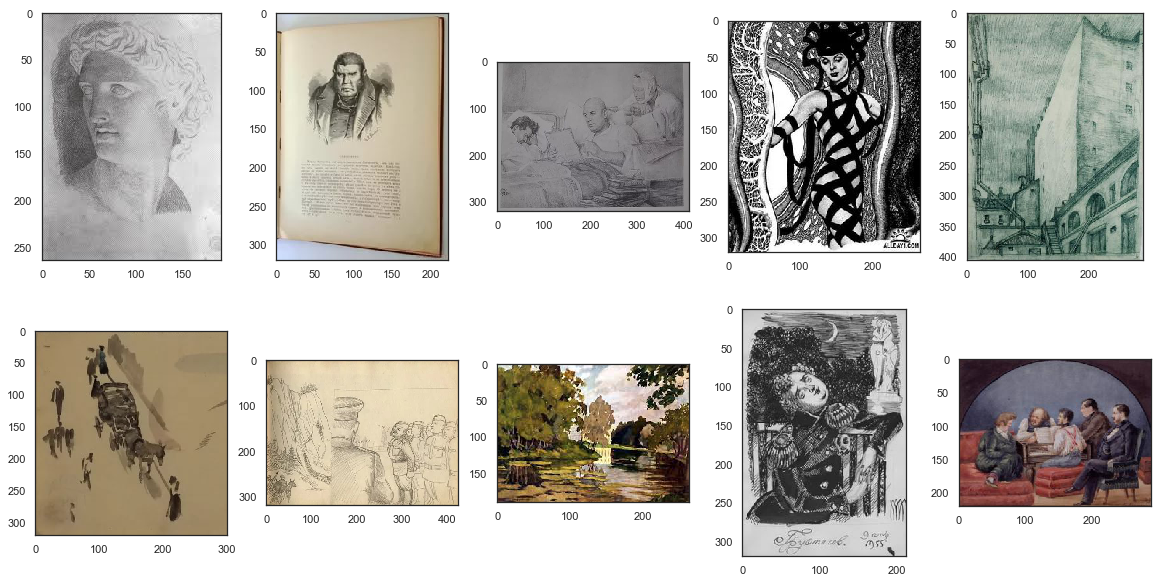

In [268]:
def show_images_for_art(art_type="drawings", num_pics=10):
    assert art_type in categories
    
    pic_dir = os.path.join(train_path, art_type)
    pic_files = [os.path.join(pic_dir, filename) for filename in os.listdir(pic_dir)]

    ncols = 5
    nrows = (num_pics - 1) // ncols + 1
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4))
    
    fig.set_size_inches((20, nrows * 5))
    ax = ax.ravel()
    
    for pic, ax in zip(pic_files[:num_pics], ax):
        img = imread(pic)
        ax.imshow(img, resample=True)
    
    plt.show();
    
show_images_for_art(art_type="drawings")

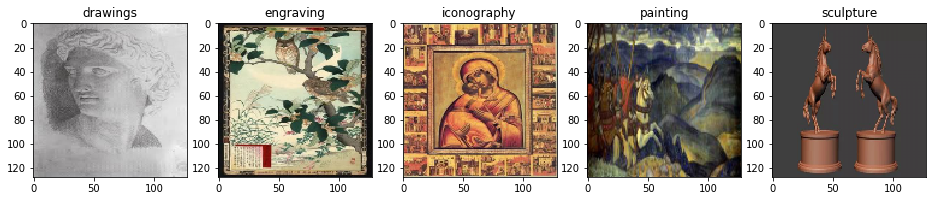

In [96]:
# Just have a look at the categories itself, one image shall be ok

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(16, 4))

for i, cat in enumerate(categories):
    cat_path = os.path.join(train_path, cat)
    img_name = os.listdir(cat_path)[0]
    
    img = imread(os.path.join(cat_path, img_name))
    img = resize(img, (img_width, img_height, img_channels), mode='reflect')
    
    ax[i].imshow(img, resample=True)
    ax[i].set_title(cat)
    
plt.show();

## What is the distribution across the categories?

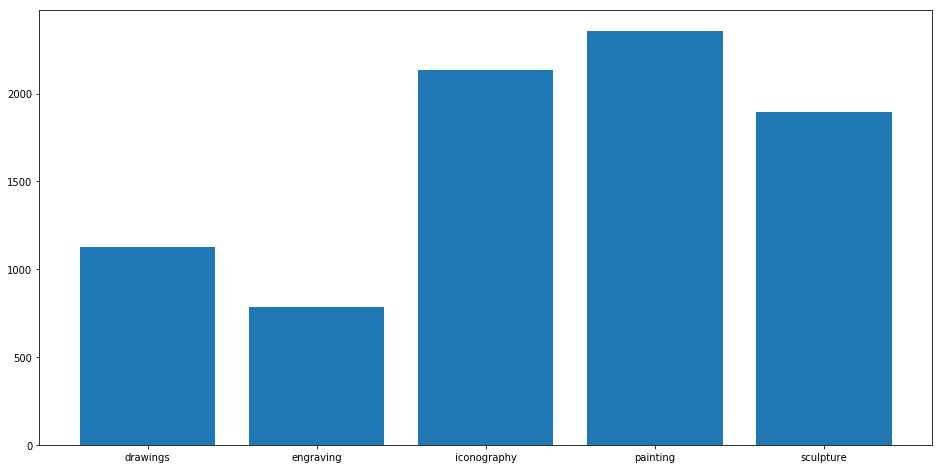

In [98]:
n_imgs = []
for cat in categories:
    files = os.listdir(os.path.join(train_path, cat))
    n_imgs += [len(files)]

plt.figure(figsize=(16, 8))
plt.bar([_ for _ in range(5)], n_imgs, tick_label=categories)
plt.show();

## Checking for invalid images

In [120]:
count = 0

for i, cat in enumerate(categories):
    cat_path = os.path.join(train_path, cat)
    images = [file for file in os.listdir(cat_path)]

    for image in images:
        try:
            img = Image.open(os.path.join(cat_path, image))
        except:
            count += 1

print("Total bad images in training dataset: {}".format(str(count)))

Total bad images in training dataset: 113


Assumging that we have in train, test and validation bad images, we shall remove them.

In [122]:
count = 0

for path in [train_path, test_path, val_path]:
    for i, cat in enumerate(categories):
        cat_path = os.path.join(path, cat)
        images = [file for file in os.listdir(cat_path)]

        for image in images:
            try:
                img = Image.open(os.path.join(cat_path, image))
            except:
                os.remove(os.path.join(cat_path, image))
                count += 1
                
    print("Removed {} bad images from {}".format(str(count), path))

Removed 113 bad images from dataset/train/
Removed 123 bad images from dataset/test/
Removed 139 bad images from dataset/validation/


## Calculate number of images in train, test and validation

In [134]:
num_train_sample = 0
for i, cat in enumerate(categories):
    cat_path = os.path.join(train_path, cat)
    num_train_sample += len(os.listdir(cat_path))
    
print('Total number of training samples: {}'.format(num_train_sample))

Total number of training samples: 8188


In [253]:
num_test_sample = 0
for i, cat in enumerate(categories):
    cat_path = os.path.join(test_path, cat)
    num_test_sample += len(os.listdir(cat_path))
    
print('Total number of test samples: {}'.format(num_test_sample))

Total number of test samples: 818


In [135]:
num_validation_sample = 0
for i, cat in enumerate(categories):
    cat_path = os.path.join(val_path, cat)
    num_validation_sample += len(os.listdir(cat_path))
    
print('Total number of validation samples: {}'.format(num_validation_sample))

Total number of validation samples: 1107


# Preprocessing

Let's prepare the data using `flow_from_directory` to generate batches of image data (and labels) and resize all images to 128x128.

**Question**: should we preprocess the images for the pre-trained VGG network?

In [191]:
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

In [192]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        'dataset/validation',
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')

Found 8188 images belonging to 5 classes.
Found 1107 images belonging to 5 classes.
Found 818 images belonging to 5 classes.


## Create keras model

In [193]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [195]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=input_shape, activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(5, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
plot_model(model, to_file='model_plot_0.png', show_shapes=True, show_layer_names=True)

In [196]:
%%time

train_result = model.fit_generator(
            train_generator,
            steps_per_epoch=num_train_sample // batch_size,
            epochs=50,
            validation_data=validation_generator,
            validation_steps=num_validation_sample // batch_size, 
            use_multiprocessing=True)

Epoch 1/50
255/255 [==============================] - 118s 463ms/step - loss: 1.0911 - acc: 0.5614 - val_loss: 0.8315 - val_acc: 0.6820
Epoch 2/50
255/255 [==============================] - 121s 474ms/step - loss: 0.7631 - acc: 0.7223 - val_loss: 0.6151 - val_acc: 0.7842
Epoch 3/50
255/255 [==============================] - 118s 463ms/step - loss: 0.6542 - acc: 0.7649 - val_loss: 0.5434 - val_acc: 0.7888
Epoch 4/50
255/255 [==============================] - 117s 459ms/step - loss: 0.6028 - acc: 0.7841 - val_loss: 0.5617 - val_acc: 0.8047
Epoch 5/50
255/255 [==============================] - 118s 463ms/step - loss: 0.5545 - acc: 0.8019 - val_loss: 0.5071 - val_acc: 0.8047
Epoch 6/50
255/255 [==============================] - 118s 462ms/step - loss: 0.5180 - acc: 0.8167 - val_loss: 0.4481 - val_acc: 0.8167
Epoch 7/50
255/255 [==============================] - 117s 458ms/step - loss: 0.4828 - acc: 0.8261 - val_loss: 0.4531 - val_acc: 0.8270
Epoch 8/50
255/255 [============================

## Save model

In [197]:
model.save('CNN_base_run1.h5')

## Visualize training history

Let's display Loss and Accuravy

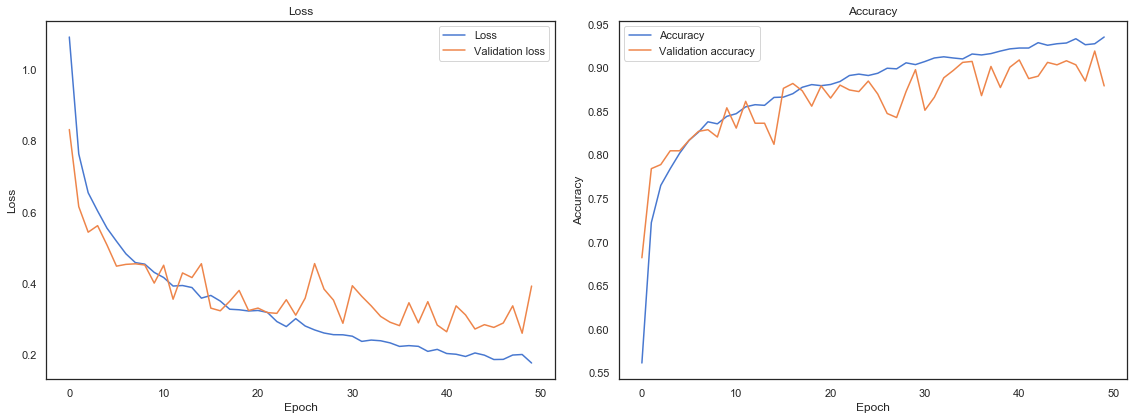

In [198]:
sns.set(style="white", palette="muted", color_codes=True)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

ax[0].plot(train_result.history['loss'], label="Loss")
ax[0].plot(train_result.history['val_loss'], label="Validation loss")
ax[0].set_title('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(train_result.history['acc'], label="Accuracy")
ax[1].plot(train_result.history['val_acc'], label="Validation accuracy")
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.tight_layout()

plt.show();

## Evalute test data

In [199]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=32)
y_hat_test = model.predict_generator(test_generator, steps=32)

print('Generated {} predictions'.format(len(y_hat_test)))
print('Test accuracy: {:.2f}%'.format(test_acc * 100))

Generated 1010 predictions
Test accuracy: 91.88%


# Pre-Trained Network Part 1

We can leverage a pre-trained network like the VGG19 architecture, which is pre-trained on the ImageNet dataset. Even so the ImageNet dataset contains only "cats" and "dogs" it can be used for a more generalized problem like the Art Images.

Here we will only instantiate the convolutional part of the model, everything up to the fully-connected layers. In our case we will freeze the layers of the VGG19 model. And only fine-tune the added layers.

To further improve the model we could make the last five nodes trainable. But that is for another time.

In [248]:
# Load the VGG19 network
vgg_model = VGG19(include_top=False, weights='imagenet', input_shape=input_shape)
vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
__________

## Fine-tuning the network 

In [260]:
model = Sequential([
    vgg_model,
    Flatten(),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')
])

vgg_model.trainable = False

# Check what layers are trainable
for layer in model.layers:
    print(layer.name, layer.trainable)
    
model.summary()

vgg19 False
flatten_24 True
dense_66 True
dense_67 True
dense_68 True
dense_69 True
dense_70 True
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_24 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_66 (Dense)             (None, 32)                262176    
_________________________________________________________________
dense_67 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_68 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_69 (Dense)             (None, 64)                8256      
____________________________________________

In [ ]:
plot_model(model, to_file='model_plot_1.png', show_shapes=True, show_layer_names=True)

In [261]:
%%time

# Compilation
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['accuracy'])

# Fitting the Model
train_result = model.fit_generator(
    train_generator,
    steps_per_epoch=num_train_sample // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=num_validation_sample // batch_size,
    use_multiprocessing=True)

Epoch 1/25
127/127 [==============================] - 562s 4s/step - loss: 1.4872 - acc: 0.3794 - val_loss: 1.3354 - val_acc: 0.6066
Epoch 2/25
127/127 [==============================] - 579s 5s/step - loss: 1.2319 - acc: 0.6011 - val_loss: 1.0667 - val_acc: 0.6691
Epoch 3/25
127/127 [==============================] - 593s 5s/step - loss: 1.0156 - acc: 0.6712 - val_loss: 0.8635 - val_acc: 0.7156
Epoch 4/25
127/127 [==============================] - 585s 5s/step - loss: 0.8599 - acc: 0.7224 - val_loss: 0.7976 - val_acc: 0.7169
Epoch 5/25
127/127 [==============================] - 583s 5s/step - loss: 0.7517 - acc: 0.7421 - val_loss: 0.6418 - val_acc: 0.7665
Epoch 6/25
127/127 [==============================] - 569s 4s/step - loss: 0.6705 - acc: 0.7628 - val_loss: 0.6223 - val_acc: 0.7941
Epoch 7/25
127/127 [==============================] - 551s 4s/step - loss: 0.6191 - acc: 0.7862 - val_loss: 0.6047 - val_acc: 0.7834
Epoch 8/25
127/127 [==============================] - 543s 4s/step - 

## Save model

In [262]:
model.save('VGG19_Feature_Engineered.h5')

## Visualize training history

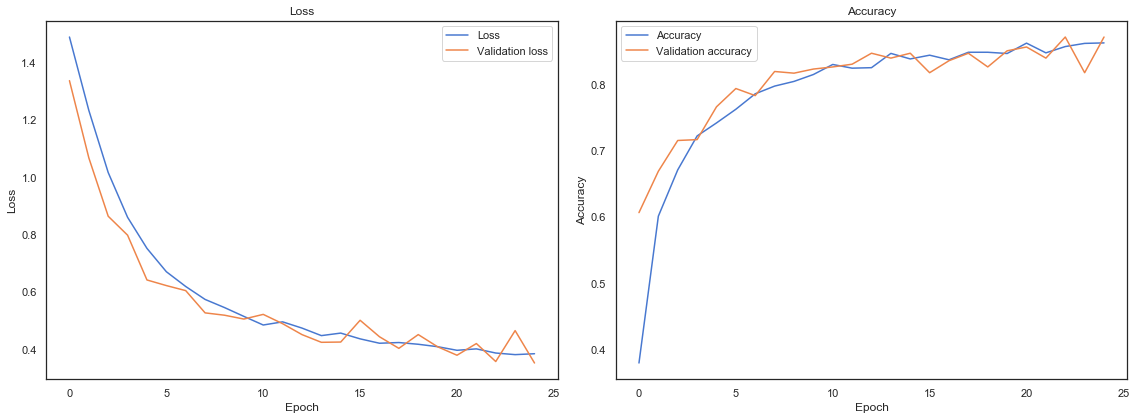

In [263]:
sns.set(style="white", palette="muted", color_codes=True)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

ax[0].plot(train_result.history['loss'], label="Loss")
ax[0].plot(train_result.history['val_loss'], label="Validation loss")
ax[0].set_title('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(train_result.history['acc'], label="Accuracy")
ax[1].plot(train_result.history['val_acc'], label="Validation accuracy")
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.tight_layout()

plt.show();

## Evaluate test data

In [264]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=32, use_multiprocessing=True)
y_hat_test = model.predict_generator(test_generator, steps=32, use_multiprocessing=True)

print('Generated {} predictions'.format(len(y_hat_test)))
print('Test accuracy: {:.2f}%'.format(test_acc * 100))

Generated 1010 predictions
Test accuracy: 88.02%


# Pre-Trained Network Part 2

As we did above we will use the pre-trained VGG19 network. Only this time we will run the model on our training and validation data once and record the output in two numpy arrays. Then we will train a small fully-connected model on top of the stored features.

The reason why we are storing the features offline rather than adding our fully-connected model directly on top of a frozen convolutional base and running the whole thing, is computational effiency. Running VGG16 is expensive, especially if you're working on CPU, and we want to only do it once. 

Note that this prevents us from using data augmentation.

In [250]:
vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
__________

We will set the `class_mode` to `None`. The generator will only yield batches of image data, which is useful to use with `model.predict_generator()`. This means that the generator will only have batches of data and no labels.

In [238]:
%%time
datagen = ImageDataGenerator(rescale=1. / 255)

generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)

bottleneck_features_train = vgg_model.predict_generator(
    generator, nb_train_samples // batch_size, use_multiprocessing=True)

# Save the output as a numpy array
np.save(open('bottleneck_features_train.npy', 'wb'),
        bottleneck_features_train)

Found 8188 images belonging to 5 classes.
CPU times: user 21min 28s, sys: 1min 58s, total: 23min 26s
Wall time: 3min 41s


In [239]:
%%time
generator = datagen.flow_from_directory(
    val_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)

bottleneck_features_validation = vgg_model.predict_generator(
    generator, nb_validation_samples // batch_size, use_multiprocessing=True)

# Save the output as a numpy array
np.save(open('bottleneck_features_validation.npy', 'wb'), 
        bottleneck_features_validation)

Found 1107 images belonging to 5 classes.
CPU times: user 8min 18s, sys: 45.7 s, total: 9min 4s
Wall time: 1min 23s


In [240]:
train_data = np.load(open('bottleneck_features_train.npy', 'rb'))
train_labels = np.array([0] * (nb_train_samples // 2) + [1] * (nb_train_samples // 2))

validation_data = np.load(open('bottleneck_features_validation.npy', 'rb'))
validation_labels = np.array([0] * (nb_validation_samples // 2) + [1] * (nb_validation_samples // 2))

In [241]:
model = Sequential([
    Flatten(input_shape=train_data.shape[1:]),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='softmax')
])

In [ ]:
plot_model(model, to_file='model_plot_2.png', show_shapes=True, show_layer_names=True)

In [242]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
%%time
train_result = model.fit(train_data, train_labels,
                         epochs=epochs,
                         batch_size=batch_size,
                         validation_data=(validation_data, validation_labels))

model.save_weights('bottleneck_fc_model.h5')

## Visualize training history

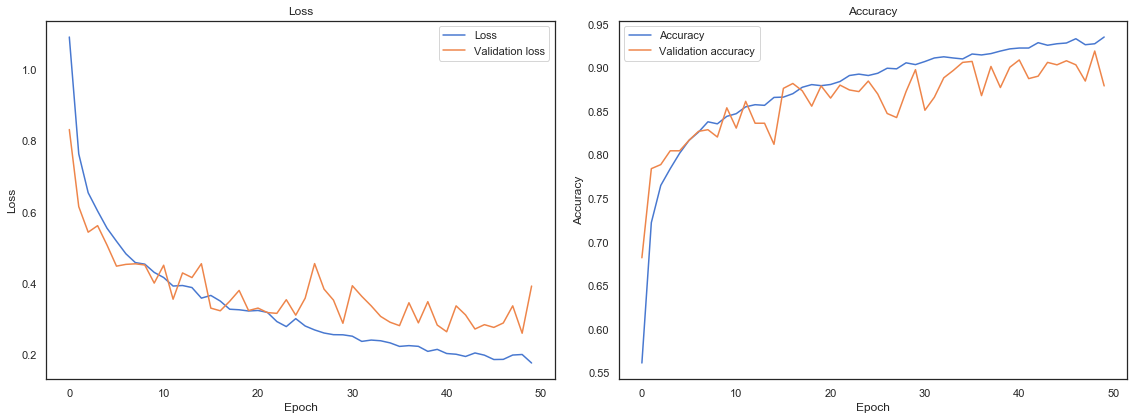

In [218]:
sns.set(style="white", palette="muted", color_codes=True)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

ax[0].plot(train_result.history['loss'], label="Loss")
ax[0].plot(train_result.history['val_loss'], label="Validation loss")
ax[0].set_title('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(train_result.history['acc'], label="Accuracy")
ax[1].plot(train_result.history['val_acc'], label="Validation accuracy")
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.tight_layout()

plt.show();

## Evaluate test data

In [ ]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=32)
y_hat_test = model.predict_generator(test_generator, steps=32)

print('Generated {} predictions'.format(len(y_hat_test)))
print('Test accuracy: {:.2f}%'.format(test_acc * 100))